## Importing Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:\Become Assessment\SnackLine.csv')

In [3]:
df.set_index('CustomerID',inplace=True)
df

,Age Group,Income Level,Region,Purchase Frequency,Health Preference,Brand Recall,Snack Perception
CustomerID,,,,,,,
1,45-54,Medium,East,Rarely,Organic,NourishAI,A way to try new flavors and ingredients.
2,25-34,Low,East,Weekly,Vegan,NourishAI,Something crunchy and tasty to enjoy.
3,35-44,Medium,North,Monthly,No preference,Competitor A,A quick energy boost during work.
4,65+,High,East,Never,Vegan,No preference,Something crunchy and tasty to enjoy.
5,55-64,Low,North,Monthly,Organic,Competitor B,Something crunchy and tasty to enjoy.
...,...,...,...,...,...,...,...
996,45-54,Low,West,Weekly,No preference,Competitor B,A quick energy boost during work.
997,45-54,Medium,South,Monthly,Vegan,NourishAI,A way to try new flavors and ingredients.
998,65+,Medium,East,Monthly,Organic,Competitor B,A guilty pleasure for movie nights.


## Analysis

### How often do each Age Group purchase snacks?

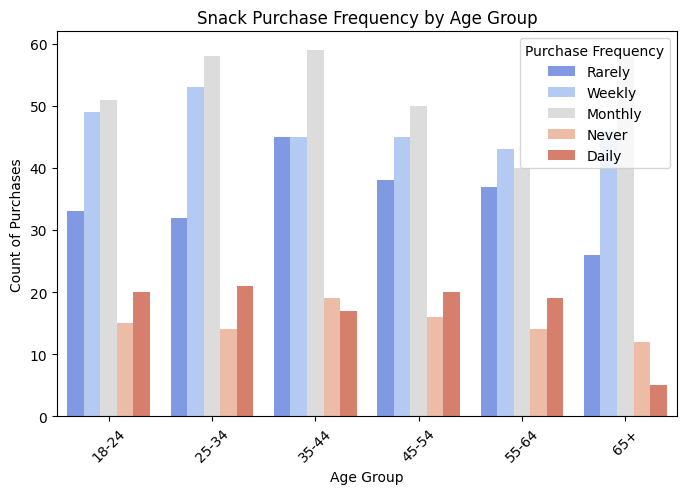

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

# Define custom order for Age Groups
age_order = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]

sns.countplot(data=df, x="Age Group", hue="Purchase Frequency", palette="coolwarm", order=age_order)

plt.title("Snack Purchase Frequency by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count of Purchases")
plt.xticks(rotation=45) 
plt.legend(title="Purchase Frequency")

plt.show()


### Health Preference of each Age Group

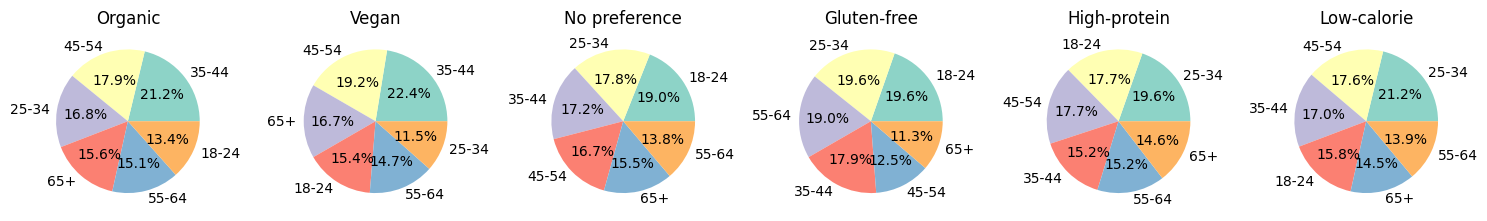

In [5]:
# Grouping by Health Preference and counting Age Groups
health_prefs = df["Health Preference"].dropna().unique()

# Set up subplots dynamically
fig, axes = plt.subplots(1, len(health_prefs), figsize=(15, 5))

# Ensure axes is always iterable (for cases with one preference)
if len(health_prefs) == 1:
    axes = [axes]

# Loop through each health preference and plot a pie chart for Age Groups
for i, health_pref in enumerate(health_prefs):
    subset = df[df["Health Preference"] == health_pref]
    age_distribution = subset["Age Group"].value_counts()

    axes[i].pie(age_distribution, labels=age_distribution.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
    axes[i].set_title(health_pref)

plt.tight_layout()
plt.show()


### What each Age Group thinks about Snacks


We'll be creating a keyword column which contains the key points from the snack perception column using the yake library

In [6]:
import yake

# Set up YAKE extractor
yake_extractor = yake.KeywordExtractor(lan="en", n=2, top=5)

# Extract keywords from each feedback
df["Keywords"] = df["Snack Perception"].dropna().apply(lambda x: yake_extractor.extract_keywords(x))

In [7]:
df['Keywords']

CustomerID
1       [(ingredients, 0.15831692877998726), (flavors,...
2       [(enjoy, 0.15831692877998726), (crunchy, 0.297...
3       [(quick energy, 0.09700399286574239), (energy ...
4       [(enjoy, 0.15831692877998726), (crunchy, 0.297...
5       [(enjoy, 0.15831692877998726), (crunchy, 0.297...
                              ...                        
996     [(quick energy, 0.09700399286574239), (energy ...
997     [(ingredients, 0.15831692877998726), (flavors,...
998     [(movie nights, 0.04940384002065631), (guilty ...
999     [(ingredients, 0.15831692877998726), (flavors,...
1000    [(quick energy, 0.09700399286574239), (energy ...
Name: Keywords, Length: 1000, dtype: object

the keyword column is a list of tuples with each tuple containing the keyword and its proability, we want to extract the value of the keyword from second tuple in each of the record

In [8]:
def keywordExtraction(x):
    return x[1][0]

df['Keywords'] = df['Keywords'].apply(keywordExtraction)


In [9]:
df

,Age Group,Income Level,Region,Purchase Frequency,Health Preference,Brand Recall,Snack Perception,Keywords
CustomerID,,,,,,,,
1,45-54,Medium,East,Rarely,Organic,NourishAI,A way to try new flavors and ingredients.,flavors
2,25-34,Low,East,Weekly,Vegan,NourishAI,Something crunchy and tasty to enjoy.,crunchy
3,35-44,Medium,North,Monthly,No preference,Competitor A,A quick energy boost during work.,energy boost
4,65+,High,East,Never,Vegan,No preference,Something crunchy and tasty to enjoy.,crunchy
5,55-64,Low,North,Monthly,Organic,Competitor B,Something crunchy and tasty to enjoy.,crunchy
...,...,...,...,...,...,...,...,...
996,45-54,Low,West,Weekly,No preference,Competitor B,A quick energy boost during work.,energy boost
997,45-54,Medium,South,Monthly,Vegan,NourishAI,A way to try new flavors and ingredients.,flavors
998,65+,Medium,East,Monthly,Organic,Competitor B,A guilty pleasure for movie nights.,guilty pleasure


C:\Users\Varun Pravesh\AppData\Local\Temp\ipykernel_13156\2587994365.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Count', y='Keyword', ax=ax[i], palette='Blues_r')
C:\Users\Varun Pravesh\AppData\Local\Temp\ipykernel_13156\2587994365.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Count', y='Keyword', ax=ax[i], palette='Blues_r')
C:\Users\Varun Pravesh\AppData\Local\Temp\ipykernel_13156\2587994365.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Count', y='Keyword', ax=ax[i],

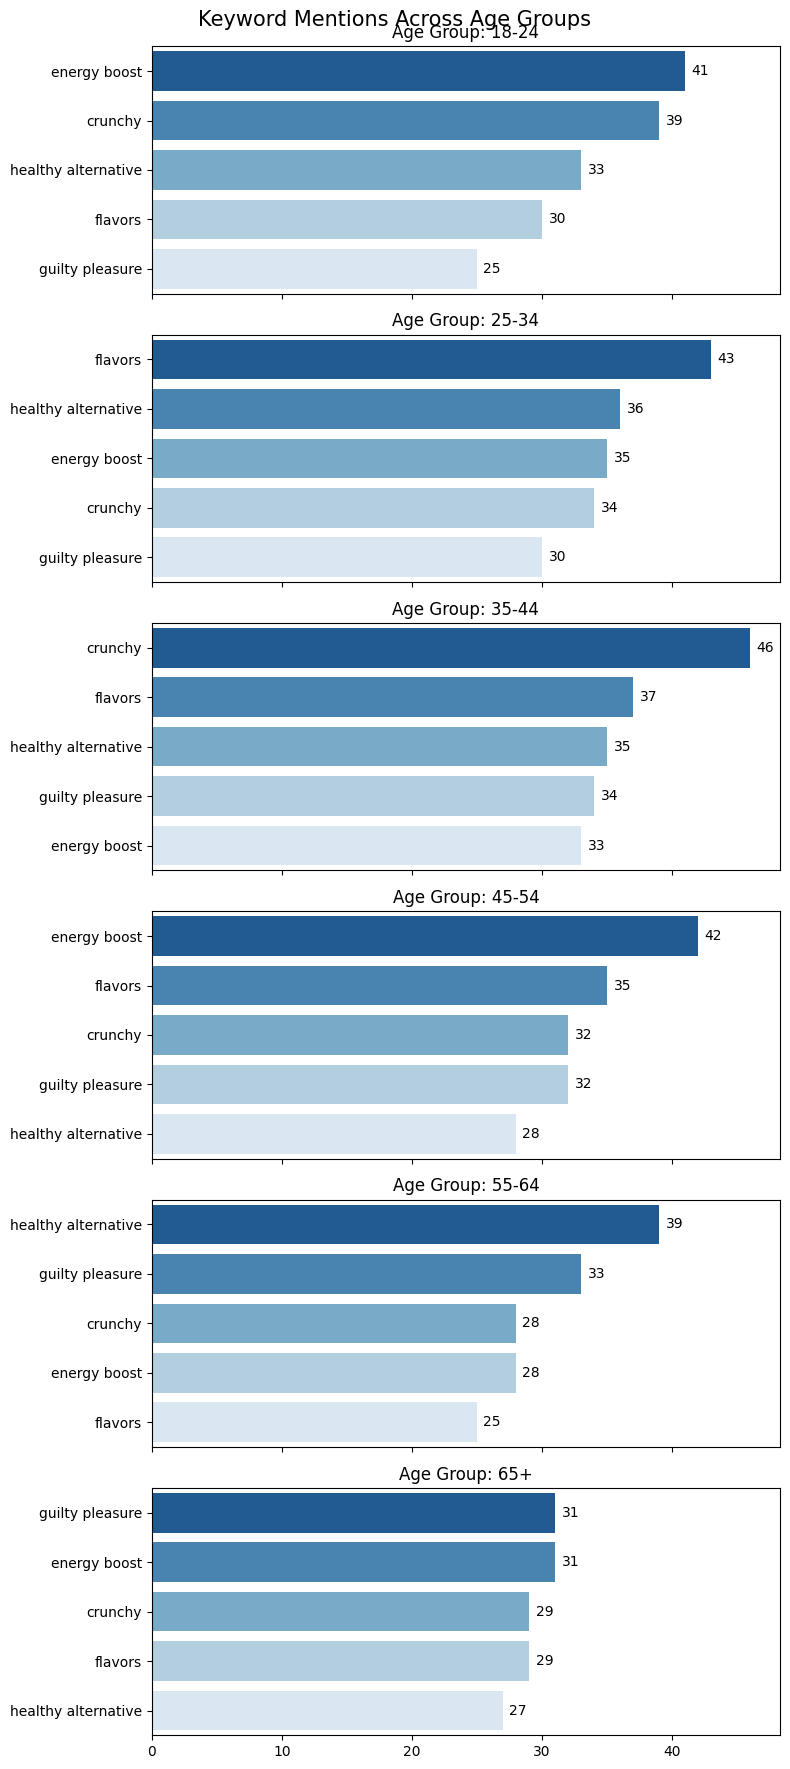

In [10]:
# Define the age group order
age_order = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
df['Age Group'] = pd.Categorical(df['Age Group'], categories=age_order, ordered=True)

# Get unique age groups in the correct order
age_groups = sorted(df['Age Group'].dropna().unique(), key=lambda x: age_order.index(x))

# Set up the figure and axes
fig, ax = plt.subplots(len(age_groups), 1, figsize=(8, len(age_groups) * 3), sharex=True)

# Ensure ax is iterable even for a single age group
if len(age_groups) == 1:
    ax = [ax]

for i, age_group in enumerate(age_groups):
    df_plot = df[df['Age Group'] == age_group]['Keywords'].value_counts().reset_index()
    df_plot.columns = ['Keyword', 'Count']

    sns.barplot(data=df_plot, x='Count', y='Keyword', ax=ax[i], palette='Blues_r')
    ax[i].set_title(f'Age Group: {age_group}')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')  
    
    # Label the count on the bars
    for n, v in enumerate(df_plot['Count']):
        ax[i].text(v + 0.5, n, str(v), va='center')


fig.suptitle('Keyword Mentions Across Age Groups', fontsize=15)
fig.tight_layout(h_pad=1)
plt.show()


### Brands purchased frequently

C:\Users\Varun Pravesh\AppData\Local\Temp\ipykernel_13156\672870666.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=brand_counts, x='Brand', y='Purchase Count', palette='viridis')


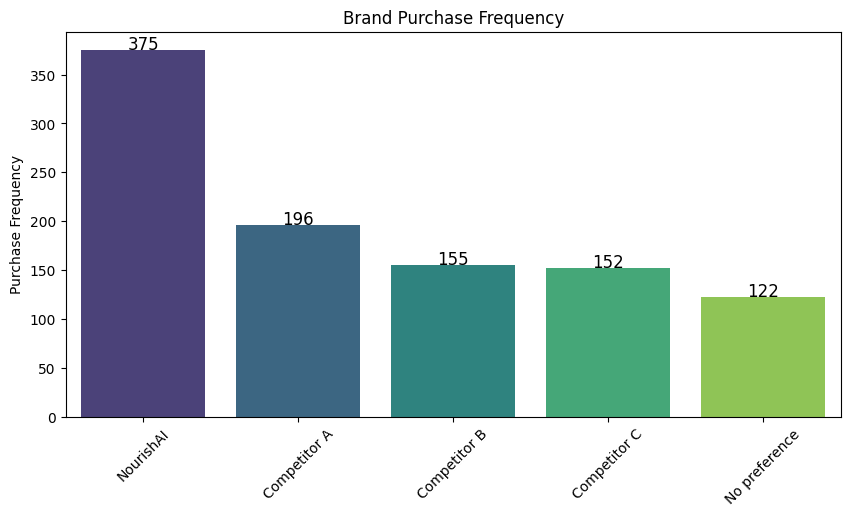

In [19]:
# Count the occurrences of each brand
brand_counts = df['Brand Recall'].value_counts().reset_index()
brand_counts.columns = ['Brand', 'Purchase Count']


plt.figure(figsize=(10, 5))
sns.barplot(data=brand_counts, x='Brand', y='Purchase Count', palette='viridis')


plt.xlabel("")
plt.ylabel("Purchase Frequency")
plt.title("Brand Purchase Frequency")
plt.xticks(rotation=45)  

# Show values on bars
for i, v in enumerate(brand_counts["Purchase Count"]):
    plt.text(i, v + 1, str(v), ha='center', fontsize=12)
    
plt.show()


### Top Brands in each region

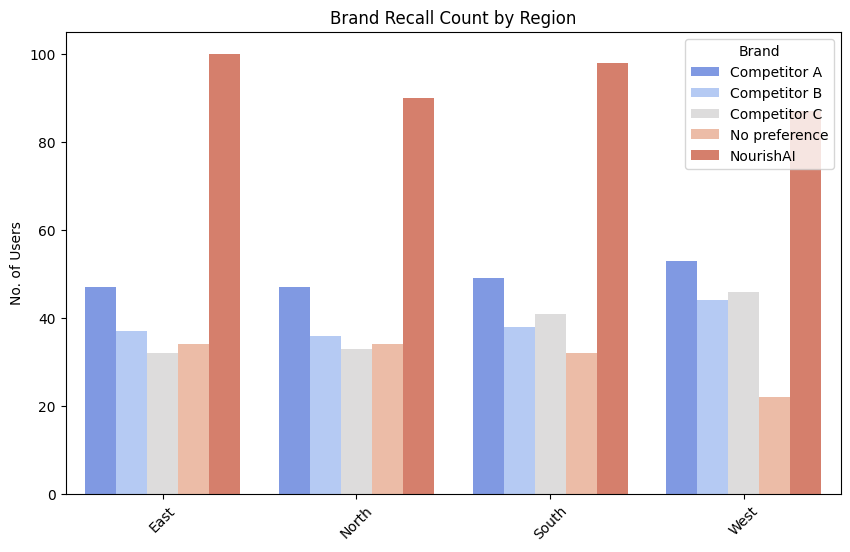

In [29]:
# Count occurrences of each Brand Recall per Region
brand_counts = df.groupby(['Region', 'Brand Recall']).size().reset_index(name='Count')


plt.figure(figsize=(10, 6))
sns.barplot(data=brand_counts, x='Region', y='Count', hue='Brand Recall', palette="coolwarm")


plt.title('Brand Recall Count by Region')
plt.xlabel('')
plt.ylabel('No. of Users')
plt.legend(title='Brand')
plt.xticks(rotation=45)  

# Show plot
plt.show()


### What Brands do users prefer for each Food Type

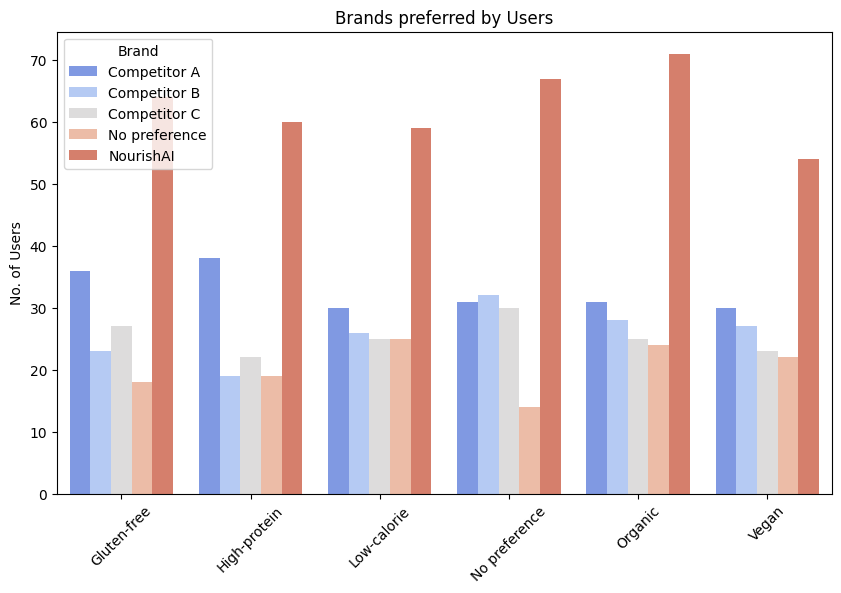

In [30]:
food_counts = df.groupby(['Health Preference', 'Brand Recall']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=food_counts, x='Health Preference', y='Count', hue='Brand Recall', palette="coolwarm")


plt.title('Brands preferred by Users')
plt.xlabel('')
plt.ylabel('No. of Users')
plt.legend(title='Brand')
plt.xticks(rotation=45)  


plt.show()


### Correlation between Income Level and Purchase Frequency

Chi-Square Statistic: 7.466760962931005, p-value: 0.4872083000213995


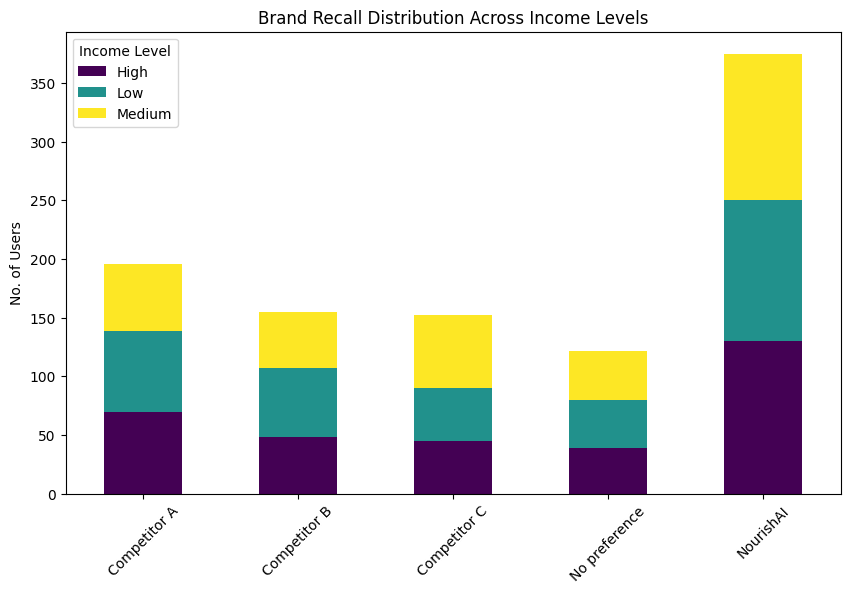

In [ ]:
from scipy.stats import chi2_contingency

# Convert categorical values to numerical for Income Level
income_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Income Level Numeric'] = df['Income Level'].map(income_mapping)

# Create a crosstab (contingency table) of Income Level vs Brand Recall
contingency_table = pd.crosstab(df['Income Level'], df['Brand Recall'])

# Perform Chi-Square Test to check correlation
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

# If p-value < 0.05, there is a significant relationship

# Plot a stacked bar chart
contingency_table.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title("Brand Recall Distribution Across Income Levels")
plt.xlabel("")
plt.ylabel("No. of Users")
plt.legend(title="Income Level")
plt.xticks(rotation=45)
plt.show()
